In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
@author: omayr
@description: POC: Exploratody Analysis of CampusKlubi Sensor Data
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os import path
from IPython.display import display    

def read_file():
    
    p = str(path.dirname(path.abspath("__file__")))+"/data/sample/"
    files = [f for f in listdir(p) if path.isfile(path.join(p,f))]
    cols = ['utc_org_rec_time']
    cols.extend([x.split('.')[0] for x in files])
    data = pd.DataFrame()
    
    for file in files:
        temp = pd.read_csv("data/sample/"+file)
        data = pd.concat((data,temp[['value']]),axis=1)

    data = pd.concat((temp[['utc_org_rec_time']],data),axis=1)

    data['utc_org_rec_time'] = temp['utc_org_rec_time']
    data['utc_org_rec_time'] = pd.to_datetime(data['utc_org_rec_time'])
    data['utc_org_rec_time'] = pd.DatetimeIndex(data['utc_org_rec_time'])
    
    data.columns = ['time', 'ACS', 'AQ', 'ART', 'CS', 'CV', 'EAT', 'HV', 'PI', 'RT', 'STATUS']
    
    return data

# Sensor Abbreviation Legend
ACS : Airflow Cooling Setpoint <br />
AQ   : Air Quality <br />
ART  : Average Room Temperature <br />
CS   : Cooling Setpoint <br />
CV   : Cooling Valve <br />
EAT  : Exhaust Air Temperature <br />
HV   : Heating Valve <br />
PI   : Presence Information <br />
RT   : Room Temperature <br />

In [106]:
def basic_stats():

    data = read_file()
    display(data.describe())
   
basic_stats()

,ACS,AQ,ART,CS,CV,EAT,HV,PI,RT,STATUS
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,24.980260,10.148400,21.327598,22.045188,2.537988,21.326880,8.771218,0.201600,21.327598,0.201600
std,0.269605,3.286539,0.417590,0.223027,12.085961,0.771044,12.191854,0.401235,0.417590,0.401235
min,20.700000,0.000000,20.810000,22.000000,0.000000,0.000000,0.000000,0.000000,20.810000,0.000000
25%,25.000000,8.000000,21.000000,22.000000,0.000000,20.900000,0.000000,0.000000,21.000000,0.000000
50%,25.000000,9.000000,21.160000,22.000000,0.000000,21.100000,0.000000,0.000000,21.160000,0.000000
75%,25.000000,11.000000,21.560000,22.000000,0.000000,21.500000,25.692500,0.000000,21.560000,0.000000
max,25.000000,51.000000,22.660000,24.100000,100.000000,23.200000,30.540000,1.000000,22.660000,1.000000


,ACS,AQ,ART,CS,CV,EAT,HV,PI,RT,STATUS
ACS,1.000000,-0.059592,-0.172597,-0.021815,-0.552741,-0.115370,0.066887,-0.173268,-0.172597,-0.173268
AQ,-0.059592,1.000000,0.551370,0.111390,0.404716,0.460065,-0.246499,0.487787,0.551370,0.487787
ART,-0.172597,0.551370,1.000000,0.202547,0.461351,0.696713,-0.599663,0.795495,1.000000,0.795495
CS,-0.021815,0.111390,0.202547,1.000000,0.057391,0.129037,-0.152110,0.272478,0.202547,0.272478
CV,-0.552741,0.404716,0.461351,0.057391,1.000000,0.340794,-0.175217,0.453894,0.461351,0.453894
EAT,-0.115370,0.460065,0.696713,0.129037,0.340794,1.000000,-0.386491,0.567765,0.696713,0.567765
HV,0.066887,-0.246499,-0.599663,-0.152110,-0.175217,-0.386491,1.000000,-0.378647,-0.599663,-0.378647
PI,-0.173268,0.487787,0.795495,0.272478,0.453894,0.567765,-0.378647,1.000000,0.795495,1.000000
RT,-0.172597,0.551370,1.000000,0.202547,0.461351,0.696713,-0.599663,0.795495,1.000000,0.795495
STATUS,-0.173268,0.487787,0.795495,0.272478,0.453894,0.567765,-0.378647,1.000000,0.795495,1.000000


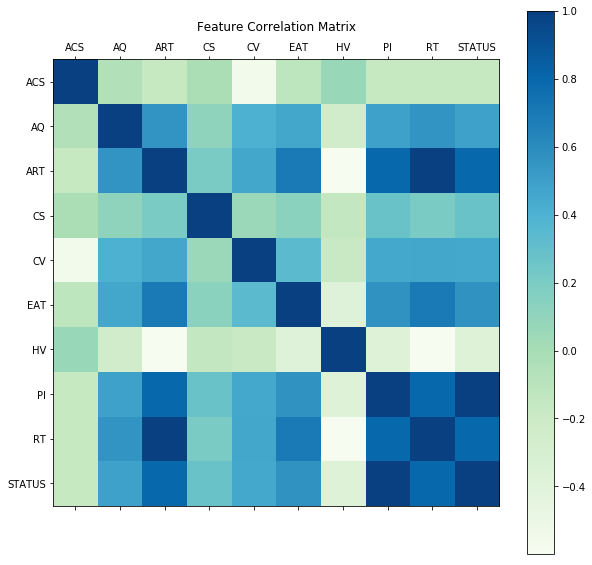

In [49]:
def visualize_corr():

    data = read_file()
    cd = data.corr()
    display(cd)
    
    cols = list(data.columns)
    cols.remove('time')
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(data.corr(), interpolation='nearest', cmap='GnBu')
    fig.colorbar(cax)
    
    plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], cols)
    plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], cols)
    plt.title('Feature Correlation Matrix')
    
    plt.show()
    
visualize_corr()

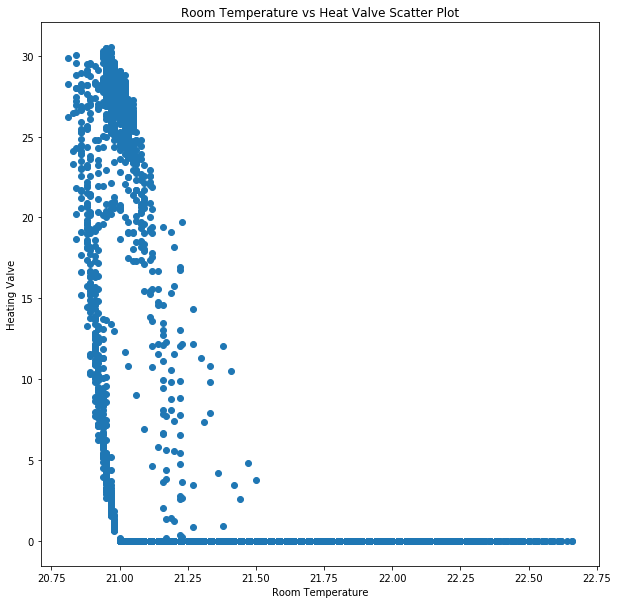

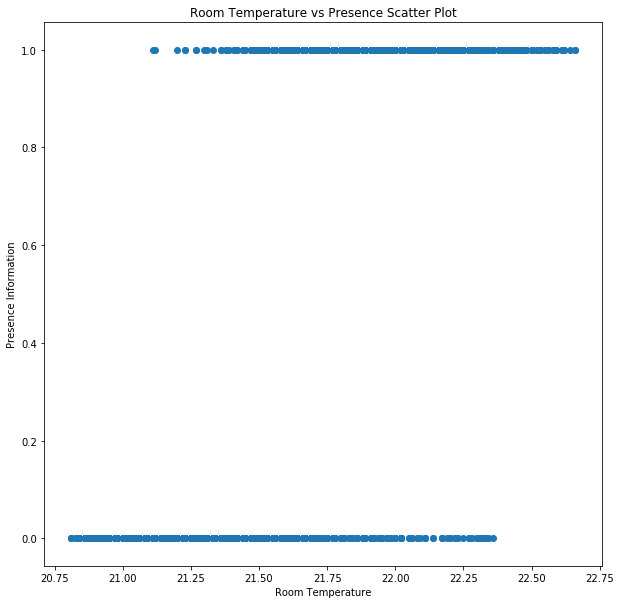

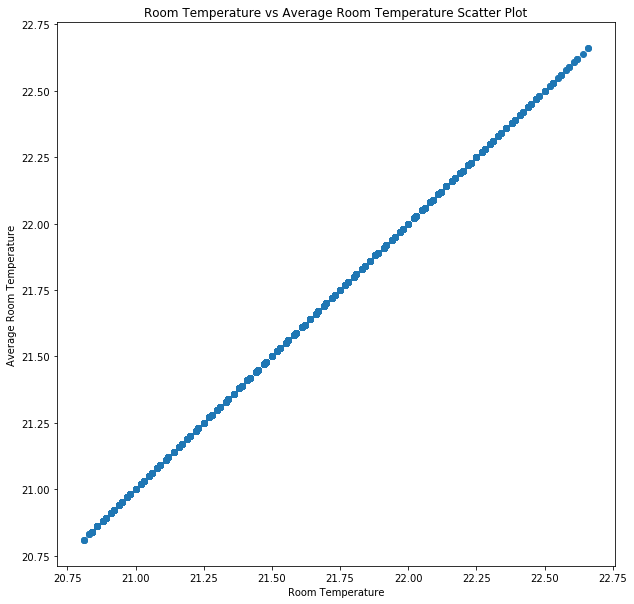

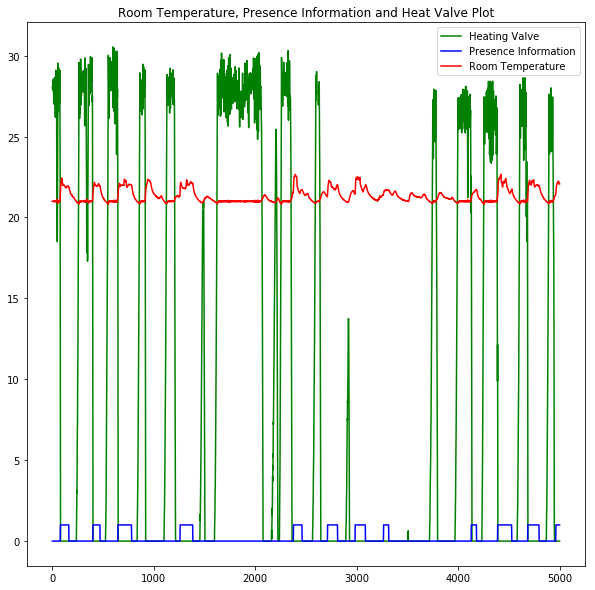

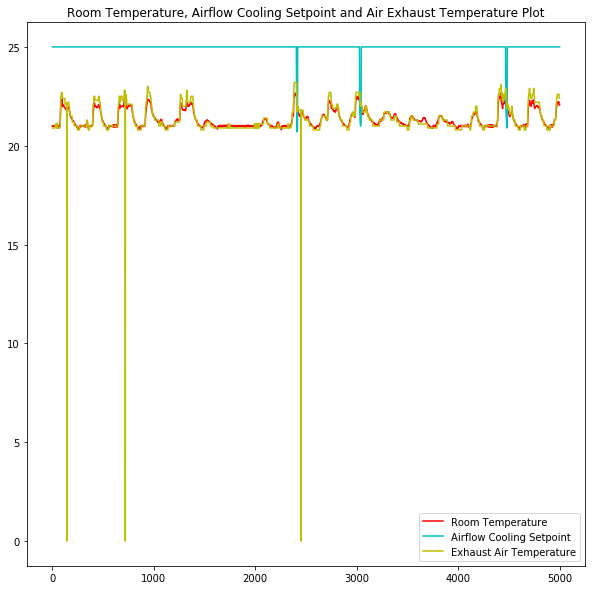

In [48]:
def visualize_plot():

    data = read_file()
    cols = list(data.columns)
    cols.remove('time')
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.scatter(data['RT'],data['HV'])
    plt.xlabel('Room Temperature')
    plt.ylabel('Heating Valve')
    plt.title('Room Temperature vs Heat Valve Scatter Plot')
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.scatter(data['RT'],data['PI'])
    plt.xlabel('Room Temperature')
    plt.ylabel('Presence Information')
    plt.title('Room Temperature vs Presence Information Scatter Plot')
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.scatter(data['RT'],data['ART'])
    plt.xlabel('Room Temperature')
    plt.ylabel('Average Room Temperature')
    plt.title('Room Temperature vs Average Room Temperature Scatter Plot')
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.plot(data['HV'], 'g', label= 'Heating Valve')
    ax.plot(data['PI'], 'b', label= 'Presence Information')
    ax.plot(data['RT'], 'r', label= 'Room Temperature')
    ax.legend(loc='best')
    plt.title('Room Temperature, Presence Information and Heat Valve Plot')
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    ax.plot(data['RT'], 'r', label= 'Room Temperature')
    ax.plot(data['ACS'], 'c', label= 'Airflow Cooling Setpoint')
    ax.plot(data['EAT'], 'y', label= 'Exhaust Air Temperature')
    plt.title('Room Temperature, Airflow Cooling Setpoint and Air Exhaust Temperature Plot')
    ax.legend(loc='best')
    plt.show()
    
    
visualize_plot()

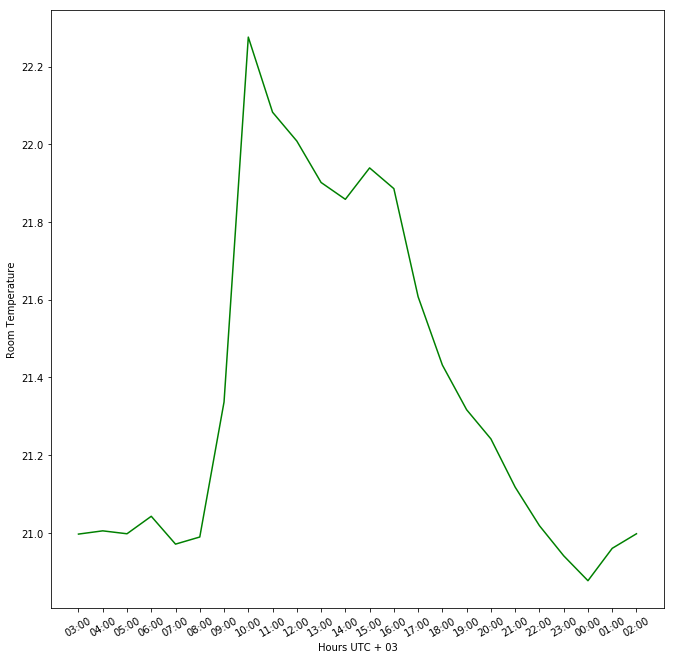

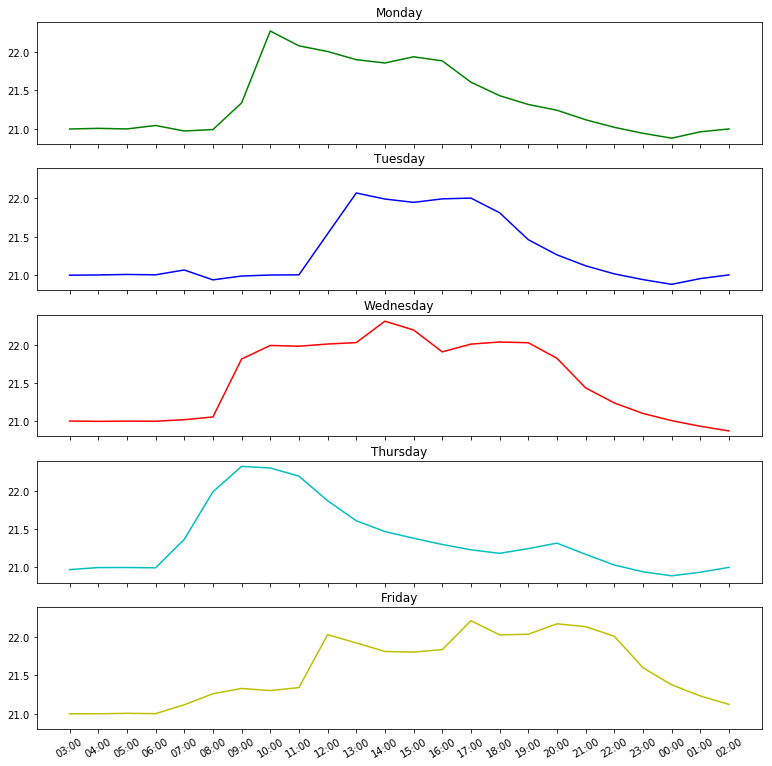

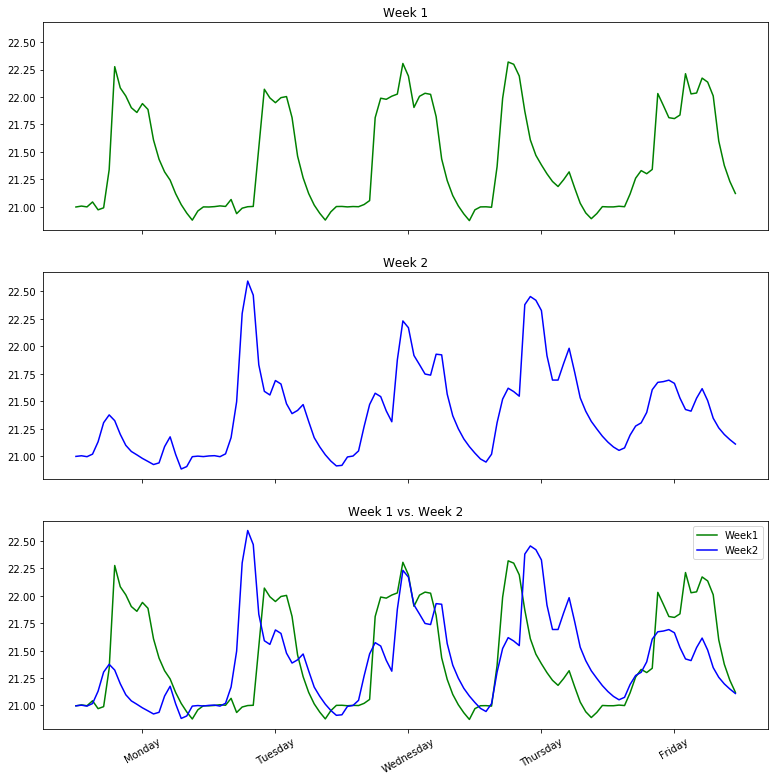

In [51]:
import time
import datetime


def hourly_data_conversion(data,offset):
    
    week = np.zeros(shape=(24,5))
    k = 0
    for i in range(0,5):
        for j in range(0,288,12):
            week[k][i] = np.mean(data.iloc[offset+(i*288)+j:offset+(i*288)+j+12]['RT']) 
            k+=1
        k = 0
    return week

def time_series_analysis():
    
    data = read_file()
    week_one = hourly_data_conversion(data,0)
    week_two = hourly_data_conversion(data,2016)
    
    fig = plt.figure(figsize=(11,11))
    ax = fig.add_subplot(111)
    ax.plot(week_one[:,0], 'g', label= 'Mon')

    
    plt.xlabel('Hours UTC + 03')
    plt.ylabel('Room Temperature')
    plt.xticks(range(0,24), ['03:00', '04:00', '05:00'
                               , '06:00', '07:00', '08:00'
                              , '09:00', '10:00', '11:00'
                              , '12:00', '13:00', '14:00'
                              , '15:00', '16:00', '17:00'
                              , '18:00', '19:00', '20:00'
                              , '21:00', '22:00', '23:00'
                              , '00:00', '01:00', '02:00'], rotation=30)
    
    # Two subplots, the axes array is 1-d
    f, axarr = plt.subplots(5, figsize=(13,13), sharex=True, sharey=True)
    axarr[0].plot(week_one[:,0], 'g')
    axarr[0].set_title('Monday')
    axarr[1].plot(week_one[:,1], 'b')
    axarr[1].set_title('Tuesday')
    axarr[2].plot(week_one[:,2], 'r')
    axarr[2].set_title('Wednesday')
    axarr[3].plot(week_one[:,3], 'c')
    axarr[3].set_title('Thursday')
    axarr[4].plot(week_one[:,4], 'y')
    axarr[4].set_title('Friday')
    
    plt.xticks(range(0,24), ['03:00', '04:00', '05:00'
                               , '06:00', '07:00', '08:00'
                              , '09:00', '10:00', '11:00'
                              , '12:00', '13:00', '14:00'
                              , '15:00', '16:00', '17:00'
                              , '18:00', '19:00', '20:00'
                              , '21:00', '22:00', '23:00'
                              , '00:00', '01:00', '02:00'], rotation=30)

    print " "
    print " "
    f, axarr = plt.subplots(3, figsize=(13,13), sharex=True, sharey=True)
    axarr[0].plot(week_one.flatten(order='F'), 'g')
    axarr[0].set_title('Week 1')
    axarr[1].plot(week_two.flatten(order='F'), 'b')
    axarr[1].set_title('Week 2')
    axarr[2].plot(week_one.ravel(order='F'), 'g', label='Week1')
    axarr[2].plot(week_two.ravel(order='F'), 'b', label='Week2')
    axarr[2].legend(loc='best')
    axarr[2].set_title('Week 1 vs. Week 2')
    
    plt.xticks(range(12,120,24),['Monday','Tuesday','Wednesday','Thursday','Friday'],rotation=30)
    plt.show()
    
time_series_analysis()